### Классификация: Wine Quality Dataset

Этот набор данных содержит информацию о различных химических характеристиках вина и его оценке качества по шкале от 0 до 10. Мы предсказываем качество вина, используя алгоритм K-Nearest Neighbors (KNN).

_Актуальность задачи_:
- Качество вина важно в винодельческой промышленности для поддержания стандартов и улучшения вкусовых качеств. Автоматическое предсказание качества может помочь виноделам быстро оценивать и улучшать производственный процесс.
- Применение алгоритма KNN находит аналогичные по характеристикам образцы, что позволяет делать более обоснованные оценки.
- Позволит выбирать какое вино можно купить по его характеристикам на упаковне.

### Регрессия: Health Expense Dataset

Этот набор данных используется для предсказания суммы, потраченной человеком на здоровье на основе различных характеристик (возраст, пол, образ жизни и т. д.), используя линейную регрессию.

_Актуальность задачи_:
- Предсказание расходов на здоровье может помочь в планировании бюджетов как для индивидов, так и для организаций здравоохранения, что особенно важно в условиях растущей стоимости медицинских услуг.
- Анализ данных о характеристиках людей и их связи с расходами на здоровье может выявить потенциальные источники экономии и улучшения качества медицинского обслуживания.

Обе задачи актуальны и обеспечивают практическое применение методов машинного обучения в реальных сценариях.


### Классификация

Для задачи классификации качества вина мы выберем accuracy_score. Это метрика, которая учитывает точность классификации. accuracy_score обеспечит сбалансированную оценку качества модели, и позволит работать в случае мультиклассовой классификации.

### Регрессия

Для задачи регрессии, связанной с предсказанием расходов на здоровье, мы будем использовать Mean Absolute Error (MAE). Это метрика, которая поддерживает ту же размерность, что и целевая переменная, что упрощает интерпретацию. MAE позволяет одинаково учитывать все ошибки и поддерживает устойчивость к выбросам, что важно для точной оценки моделей, работающих с финансовыми данными.

# Начало работы с данными

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from scipy.spatial.distance import euclidean, cityblock, chebyshev
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer


from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor



### Классификация: Wine Quality Dataset

загружаем датасет

In [2]:
wines = pd.read_csv('./winequality-red.csv')

смотрим на распределение столбца качества в нём

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


<Axes: >

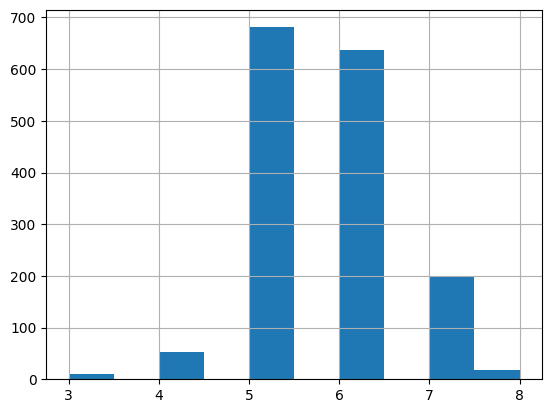

In [3]:
print(wines.quality.value_counts())
wines.quality.hist()

<Axes: >

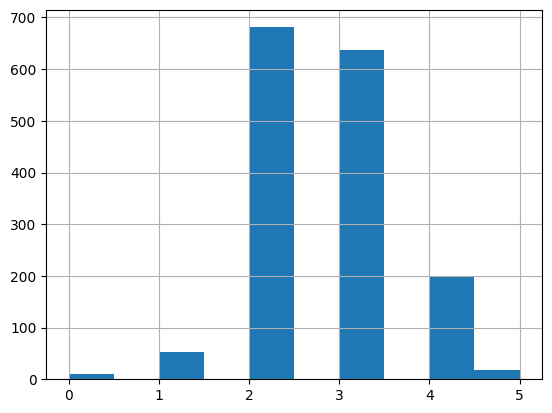

In [4]:
wines['quality'] = wines['quality'] - 3
wines.quality.hist()

проверяем пустые значения

In [5]:
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

создадим корреляционную матрицу для датасета

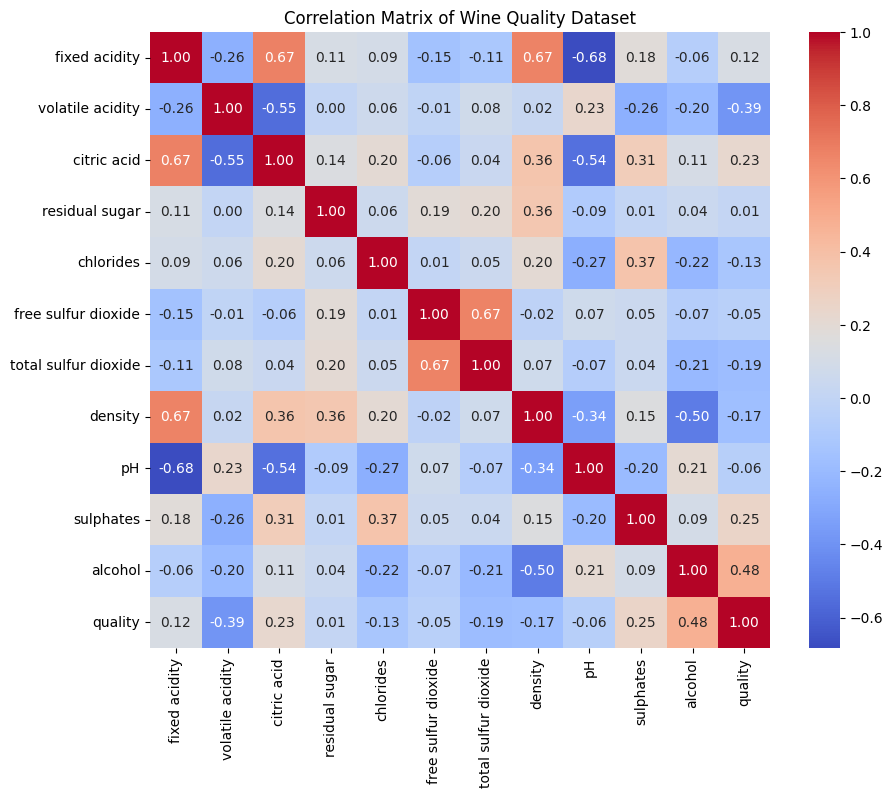

In [6]:
corr_matrix = wines.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()

На основе построенной корреляционной матрицы можно сделать следующие выводы:

1. Самая высокая положительная корреляция наблюдается между переменной alcohol и целевой переменной quality. Это указывает на то, что уровень алкоголя в вине имеет тенденцию положительно влиять на его качество.

2. Самая высокая отрицательная корреляция проявляется между volatile acidity и quality. Это указывает на то, что более высокая летучая кислотность может негативно сказываться на качестве вина.

3. Другие признаки, такие как sulphates и citric acid, также показывают умеренные корреляции с качеством. Это может указывать на их возможное влияние, но не столь значительное, как у алкоголя.

4. Остальные параметры, такие как residual sugar, chlorides, и total sulfur dioxide, показывают слабые корреляции с качеством, что говорит о том, что они в меньшей степени влияют на итоговое качество вина.


разбиваем датасет на выборки

In [7]:
Wine_X = wines.drop('quality', axis=1)
Wine_y = wines['quality']

wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(Wine_X, Wine_y, test_size=0.2, random_state=69)

print(f"Размер обучающей выборки: {wine_X_train.shape}")
print(f"Размер тестовой выборки: {wine_X_test.shape}")

Размер обучающей выборки: (1279, 11)
Размер тестовой выборки: (320, 11)


### Классификация: Health Expense Dataset

загружаем датасет

In [8]:
insurance = pd.read_csv('./insurance.csv')

смотрим на распределение столбца качества в нём

In [9]:
insurance.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


проверяем пустые значения

In [10]:
insurance_prep = pd.get_dummies(insurance, drop_first=True)
insurance_prep.isna().sum()


age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

создадим корреляционную матрицу для датасета

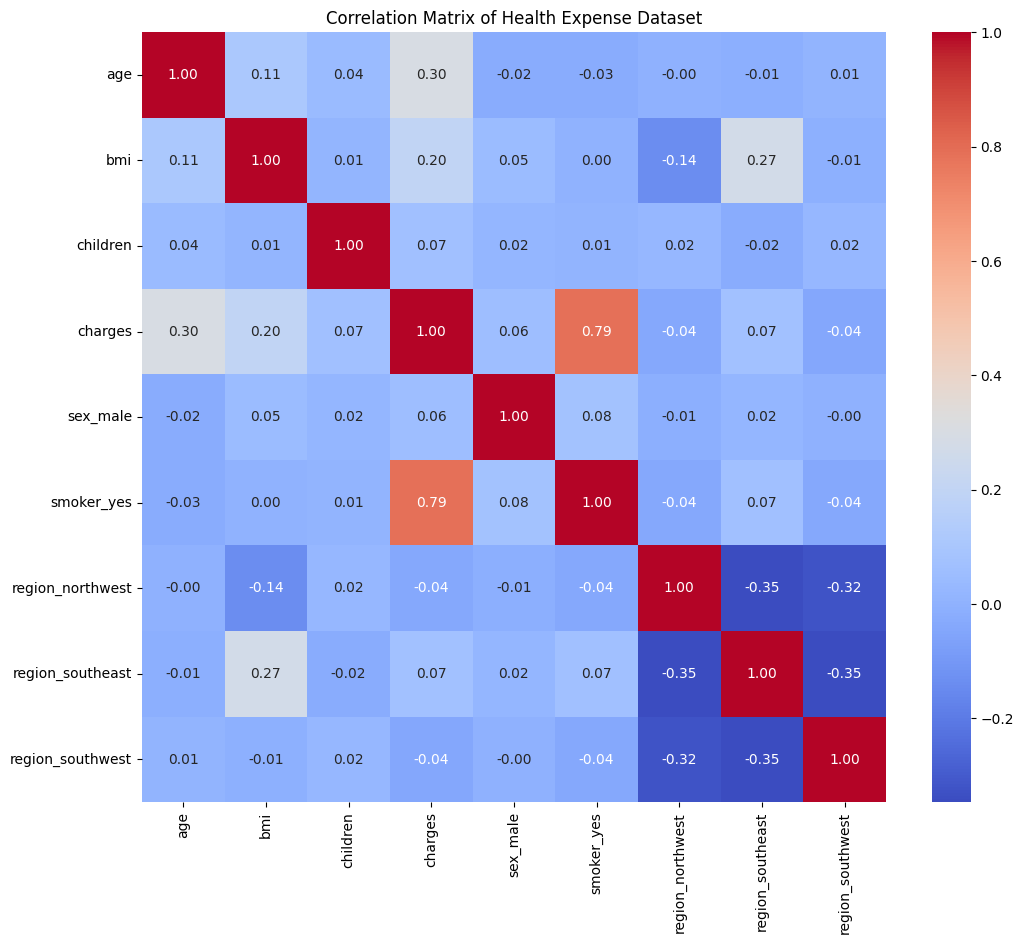

In [11]:
corr_matrix = insurance_prep.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Health Expense Dataset')
plt.show()


На основе корреляционной матрицы можно сделать следующие выводы:

1. Курение ("smoker_yes"): Имеет высокую положительную корреляцию с расходами на здоровье ("charges"). Это указывает на то, что курение сильно влияет на повышение медицинских расходов.

2. Возраст ("age"): Имеет среднюю положительную корреляцию с расходами (0.30), что подразумевает увеличение затрат на здоровье с возрастом.

3. Индекс массы тела ("bmi"): Показал слабую положительную корреляцию с расходами (0.20), что может отражать повышение затрат на здоровье при увеличении массы тела.

4. Пол ("sex_male") и количество детей ("children"): Показывают слабую корреляцию с расходами, что может указывать на их незначительное влияние на медицинские расходы.

Эти наблюдения помогут сосредоточиться на значимых факторах при построении модели регрессии для прогнозирования расходов на здоровье.

разбиваем датасет на выборки

In [12]:
insurance_X = insurance.drop('charges', axis=1)
insurance_y = insurance['charges']

insurance_X_train, insurance_X_test, insurance_y_train, insurance_y_test = train_test_split(insurance_X, insurance_y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {insurance_X_train.shape}")
print(f"Размер тестовой выборки: {insurance_X_test.shape}")

Размер обучающей выборки: (1070, 6)
Размер тестовой выборки: (268, 6)


# Работа 1 (KNN)

## Классификация

### Бейзлайн классификации

In [13]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=20))
])


pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"KNN Baseline Accuracy: {accuracy_score(wine_y_test, wine_y_pred)}")

KNN Baseline Accuracy: 0.58125


#### Подбор параметров

запустим GridSearchCV для перебора гиперпараметров

In [14]:
param_grid = {
    'classifier__n_neighbors': range(2, 8),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(wine_X_train, wine_y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая точность на кросс-валидации: {best_score}")

wine_y_pred = grid_search.predict(wine_X_test)
test_accuracy = accuracy_score(wine_y_test, wine_y_pred)
print(f"Точность на тестовом наборе: {test_accuracy}")

Лучшие параметры: {'classifier__n_neighbors': 6}
Лучшая точность на кросс-валидации: 0.582484681372549
Точность на тестовом наборе: 0.590625


### Собственная имплементация

In [15]:
class KNNBase(BaseEstimator):
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes_ = np.unique(y)
        return self

    def _get_distance(self, a, b):
        if self.metric == 'euclidean':
            return euclidean(a, b)
        elif self.metric == 'manhattan':
            return cityblock(a, b)
        elif self.metric == 'chebyshev':
            return chebyshev(a, b)
        else:
            raise ValueError(f"Неизвестная метрика: {self.metric}")

    def _get_neighbors(self, x):
        distances = np.array([self._get_distance(x, xi) for xi in self.X_train])
        return np.argsort(distances)[:self.n_neighbors]



In [16]:
class KNNClassifier(KNNBase, ClassifierMixin):
    def __init__(self, n_neighbors=5, metric='euclidean'):
        super().__init__(n_neighbors=n_neighbors, metric=metric)

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            nearest_indices = self._get_neighbors(x)
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.bincount(nearest_values).argmax())

        return np.array(predictions)

#### Бейзлайн классификации

In [17]:
# Создание пайплайна
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNNClassifier(n_neighbors=4))
])

pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"Custom KNN Baseline Accuracy: {accuracy_score(wine_y_test, wine_y_pred)}")

Custom KNN Baseline Accuracy: 0.6125


#### Подбор параметров

запустим GridSearchCV для перебора гиперпараметров

In [18]:
param_grid = {
    'classifier__n_neighbors': range(2, 8),
    'classifier__metric': ['euclidean', 'manhattan', 'chebyshev']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(wine_X_train, wine_y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая точность на кросс-валидации: {best_score}")

wine_y_pred = grid_search.predict(wine_X_test)
test_accuracy = accuracy_score(wine_y_test, wine_y_pred)
print(f"Точность на тестовом наборе: {test_accuracy}")

Лучшие параметры: {'classifier__metric': 'chebyshev', 'classifier__n_neighbors': 6}
Лучшая точность на кросс-валидации: 0.5871813725490196
Точность на тестовом наборе: 0.59375


## Регрессия

### Бейзлайн регрессии

In [19]:
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])


pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)
print(f"Sklearn KNN Baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

Sklearn KNN Baseline MAE metric is: 7315.992538523633


#### Подбор параметров

будем перебирать число соседей в KNN а также модифицируем пайплайн - будем предобрабатывать численные данные путём нормирования, так как для подсчёта расстояния это будет важно в алгоритме.

In [20]:
param_grid = {
    'regressor__n_neighbors': range(2, 11)
}

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(insurance_X_train, insurance_y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая MAE: {best_score}")

y_pred = grid_search.predict(insurance_X_test)
mae_optimized = mean_absolute_error(insurance_y_test, y_pred)
print(f"Оптимизированная MAE на тестовом наборе: {mae_optimized}")

Лучшие параметры: {'regressor__n_neighbors': 2}
Лучшая MAE: 3487.6050376308403
Оптимизированная MAE на тестовом наборе: 3500.158216432836


Нормализация численных признаков с помощью StandardScaler также важна, особенно для алгоритмов, основанных на расстоянии, как KNN. Масштабирование данных приводит их к единому стандарту, снижая влияние признаков с большим разбросом и тем самым улучшая точность модели. 

В результате, благодаря оптимальному выбору гиперпараметров и предварительной обработке данных, модель даёт более точные прогнозы.


### Собственная имплементация

In [21]:
class KNNRegressor(KNNBase, RegressorMixin):
    def __init__(self, n_neighbors=5, metric='euclidean'):
        super().__init__(n_neighbors=n_neighbors, metric=metric)

    def predict(self, X):
        X_test = np.array(X)
        predictions = []

        for x in X_test:
            nearest_indices = self._get_neighbors(x)
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.mean(nearest_values))

        return np.array(predictions)

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNNRegressor(n_neighbors=3))
])


pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)
print(f"Sklearn KNN Baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

Sklearn KNN Baseline MAE metric is: 6400.4990995310945


#### Подбор параметров

In [23]:
param_grid = {
    'regressor__n_neighbors': range(2, 11),
    'regressor__metric': ['euclidean', 'manhattan', 'chebyshev']
}

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNNRegressor(n_neighbors=3))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(insurance_X_train, insurance_y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая MAE: {best_score}")

y_pred = grid_search.predict(insurance_X_test)
mae_optimized = mean_absolute_error(insurance_y_test, y_pred)
print(f"Оптимизированная MAE на тестовом наборе: {mae_optimized}")

Лучшие параметры: {'regressor__metric': 'manhattan', 'regressor__n_neighbors': 2}
Лучшая MAE: 3482.2567969299066
Оптимизированная MAE на тестовом наборе: 3384.416197074627


### Выводы

В случае использования готового классификатора из библиотеки и в случае с собственной реализацией алгоритма, удалось достичь сопоставимых уровней точности. Это говорит о том, что реализация справляется с задачей на уровне, сравнимом со стандартными библиотечными решениями. Собственная реализация предлагает использование метрики 'manhattan', что оказало положительное влияние на результаты. Так же важно и нормировать исходные данные для получание более точных прогнозов модели.


# Работа 2 (Linear Models)

In [24]:
def add_insurance_features(df):
    df['age_bmi_interaction'] = df['age'] * df['bmi']
    df['has_children'] = (df['children'] > 0).astype(int)
    return df

In [25]:
def add_wine_features(df):
    # Суммарная кислотность
    df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']
    # Общий диоксид серы
    df['total_sulfur'] = df['free sulfur dioxide'] + df['total sulfur dioxide']
    # Соотношение кислотности и pH
    df['acidity_ph_ratio'] = df['fixed acidity'] / df['pH']
    # Алкоголь на плотность
    df['alcohol_density_ratio'] = df['alcohol'] / df['density']
    # Сумма сульфатов и хлоридов
    df['sulphates_chlorides_sum'] = df['sulphates'] + df['chlorides']
    return df


## Классификация

### Бейзлайн классификации

In [26]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"Sklearn Linear Logistic accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")

Sklearn Linear Logistic accuracy_score metric is: 0.54375


### Собственная имплементация

In [27]:
class LogisticRegressionMulticlassImpl(BaseEstimator, ClassifierMixin):
    def __init__(self, max_iter=5000, lr=0.04, tol=0.001, l1_coef=0.1):
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.l1_coef = l1_coef
        self.weights = None
        self.biases = None
        self.classes_ = None

    def fit(self, X_train, y_train):
        self.classes_ = np.unique(y_train)
        n_classes = len(self.classes_)
        n, m = X_train.shape

        # Преобразование y_train в one-vs-rest формат
        label_binarizer = LabelBinarizer()
        Y = label_binarizer.fit_transform(y_train)

        self.weights = np.zeros((n_classes, m))
        self.biases = np.zeros(n_classes)

        for idx in range(n_classes):
            y_bin = Y[:, idx].reshape(-1, 1)
            w, b = np.zeros((m, 1)), np.mean(y_bin)

            n_iter = 0
            gradient_norm = np.inf

            while n_iter < self.max_iter and gradient_norm > self.tol:
                y_hat = self.sigmoid(np.dot(X_train, w) + b)
                dJdw = np.mean(X_train * (y_hat - y_bin) + self.l1_coef * np.sign(w.T), axis=0, keepdims=True).T
                dJdb = np.mean(y_hat - y_bin)

                gradient_norm = np.linalg.norm(np.hstack([dJdw.flatten(), [dJdb]]))
                w -= self.lr * dJdw
                b -= self.lr * dJdb

                n_iter += 1

            self.weights[idx, :] = w.flatten()
            self.biases[idx] = b

        return self

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

    def predict_proba(self, X):
        logits = np.dot(X, self.weights.T) + self.biases
        return self.softmax(logits)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def softmax(x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [28]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegressionMulticlassImpl())
])

pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"Sklearn Linear Logistic accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")


Sklearn Linear Logistic accuracy_score metric is: 0.525


#### Улучшение

In [29]:
new_wine_X_train = add_wine_features(wine_X_train.copy())
new_wine_X_test = add_wine_features(wine_X_test.copy())

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegressionMulticlassImpl())
])

pipeline.fit(new_wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(new_wine_X_test)

print(f"Sklearn Linear Logistic accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")


Sklearn Linear Logistic accuracy_score metric is: 0.528125


## Регрессия

### Бейзлайн регрессии

In [30]:
from sklearn.linear_model import LinearRegression

categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)

print(f"Sklearn Linear baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

Sklearn Linear baseline MAE metric is: 4049.108722570896


### Собственная имплементация

In [31]:
class LinearRegressionImpl(BaseEstimator, ClassifierMixin):
    def __init__(self, max_iter=5000, lr=0.04, tol=0.001, l1_coef=0.1):
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.l1_coef = l1_coef
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n, m = X_train.shape
        y_train = y_train.to_numpy().reshape(-1, 1)

        self.weights = np.zeros((m, 1))
        self.bias = np.mean(y_train)

        n_iter = 0
        gradient_norm = np.inf

        while n_iter < self.max_iter and gradient_norm > self.tol:
            dJdw, dJdb = self.grads(X_train, y_train)
            gradient_norm = np.linalg.norm(np.hstack([dJdw.flatten(), [dJdb]]))
            self.weights -= self.lr * dJdw
            self.bias -= self.lr * dJdb

            n_iter += 1

        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def grads(self, X, y):
        y_hat = self.predict(X)

        dJdw = np.mean(X * (y_hat - y) + self.l1_coef * np.sign(self.weights.T), axis=0, keepdims=True).T
        dJdb = np.mean(y_hat - y)

        return dJdw, dJdb

In [32]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegressionImpl())
])

pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)


print(f"Custom Linear baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")


Custom Linear baseline MAE metric is: 4181.218199598652


#### Улучшение

добавим новый 2 новых столбка, произведение возраста на bmi и бинарный показатель наличия детей, в надежде, что это поможет улучшить точность модели + нормируем числовые значения.

In [33]:
new_insurance_X_train = add_insurance_features(insurance_X_train.copy())
new_insurance_X_test = add_insurance_features(insurance_X_test.copy())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegressionImpl())
])

pipeline.fit(new_insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(new_insurance_X_test)


print(f"My Linear baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

My Linear baseline MAE metric is: 4181.218199598652


### Выводы

Собственная реализация логистической регрессии продемонстрировала результаты, близкие к тем, что получены с использованием библиотеки scikit-learn. Это свидетельствует о правильности и эффективности подхода, используемого в разработке алгоритма. Важность дополнительной информации: Результаты эксперимента показали, что добавление новых и релевантных признаков значительно улучшает предсказательные возможности модели, что особенно выражено в значительном снижении метрики MAE. Это подчеркивает важность качественного отбора признаков в процессе разработки моделей машинного обучения.

Перспективы улучшения: Несмотря на достигнутые результаты, существует потенциал для дальнейшего повышения точности и уменьшения ошибок модели. Это можно достичь за счет оптимизации параметров, внедрения альтернативных алгоритмов обучения и улучшенных методов предобработки данных.

# Работа 3 (Decision Tree)

## Классификация

### Бейзлайн классификации

In [34]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=69))
])

pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"Sklearn DecisionTreeClassifier baseline accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")

Sklearn DecisionTreeClassifier baseline accuracy_score metric is: 0.55


#### Подбор гиперпараметров

In [35]:
param_distributions = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 3, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=69,
    n_jobs=-1
)


random_search.fit(wine_X_train, wine_y_train)
wine_y_pred = random_search.predict(wine_X_test)
print(f"Tuned DecisionTreeClassifier accuracy_score: {accuracy_score(wine_y_test, wine_y_pred)}")

# Лучшие параметры
print("Best parameters found: ", random_search.best_params_)

Tuned DecisionTreeClassifier accuracy_score: 0.55625
Best parameters found:  {'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': None, 'classifier__max_depth': 5, 'classifier__criterion': 'gini'}


### Собственная имплементация

In [36]:
class DecisionTreeClassifierImpl:
    def __init__(self, max_depth=None, max_features=None, min_samples_split=2, min_leaf_samples=None):
        self.max_depth = max_depth
        self.max_features = max_features
        self.min_samples_split = min_samples_split
        self.min_leaf_samples = min_leaf_samples
        self._node = {
            'left': None,
            'right': None,
            'feature': None,
            'threshold': None,
            'depth': 0,
            'classes_proba': None
        }
        self.tree = None
        self.classes = None


    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


    def fit(self, X, y):
        self.classes = np.unique(y)
        self.tree = {'root': self._node.copy()}
        self._build_tree(self.tree['root'], X, y)
        return self

    def predict_proba(self, X):
        proba_preds = []
        for x in X:
            preds_for_x = self._get_predict(self.tree['root'], x)
            proba_preds.append(preds_for_x)
        return np.array(proba_preds)

    def predict(self, X):
        proba_preds = self.predict_proba(X)
        preds = proba_preds.argmax(axis=1).reshape(-1, 1)
        return preds

    def get_best_split(self, X, y):
        best_j = None
        best_t = None
        best_left_ids = None
        best_right_ids = None
        best_Q = float('-inf')

        for i in range(X.shape[1]):
            unique_features = np.unique(X[:, i])
            for j in range(len(unique_features) - 1):
                cur_threshold = (unique_features[j] + unique_features[j + 1]) / 2
                left_indexes = X[:, i] < cur_threshold
                left_children_y = y[left_indexes]
                right_children_y = y[~left_indexes]

                # Условие минимального числа объектов в листе
                if len(left_children_y) < self.min_samples_split or len(right_children_y) < self.min_samples_split:
                    continue

                cur_Q = self.calc_Q(y, left_children_y, right_children_y)
                if cur_Q > best_Q:
                    best_Q = cur_Q
                    best_j = i
                    best_t = cur_threshold
                    best_left_ids = left_indexes
                    best_right_ids = ~left_indexes

        return best_j, best_t, best_left_ids, best_right_ids

    def calc_Q(self, y, y_left, y_right):
        Q = self.gini(y) - ((len(y_left) / len(y)) * self.gini(y_left) + (len(y_right) / len(y)) * self.gini(y_right))
        return Q

    def gini(self, y):
        H = 0
        for label in self.classes:
            prob = (y == label).sum() / len(y)
            H += prob * (1 - prob)
        return H

    def _build_tree(self, curr_node, X, y):
        if curr_node['depth'] == self.max_depth:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        if len(y) < self.min_samples_split:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        if len(np.unique(y)) == 1:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        j, t, left_ids, right_ids = self.get_best_split(X, y)

        if j is None or t is None:
            curr_node['classes_proba'] = {c: (y == c).mean() for c in self.classes}
            return

        curr_node['feature'] = j
        curr_node['threshold'] = t

        left = self._node.copy()
        right = self._node.copy()
        left['depth'] = curr_node['depth'] + 1
        right['depth'] = curr_node['depth'] + 1

        curr_node['left'] = left
        curr_node['right'] = right

        self._build_tree(left, X[left_ids], y[left_ids])
        self._build_tree(right, X[right_ids], y[right_ids])

    def _get_predict(self, node, x):
        if node['threshold'] is None:
            return [node['classes_proba'][c] for c in self.classes]

        if x[node['feature']] <= node['threshold']:
            return self._get_predict(node['left'], x)
        else:
            return self._get_predict(node['right'], x)

In [37]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifierImpl(max_depth=3))
])

pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"My DecisionTreeClassifierImpl baseline accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")

My DecisionTreeClassifierImpl baseline accuracy_score metric is: 0.55


#### Улучшение

In [38]:
param_grid = {
    'classifier__max_depth': [2, 3, 5, 6, 7],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(wine_X_train, wine_y_train)
wine_y_pred = grid_search.predict(wine_X_test)

print("Best parameters found: ", grid_search.best_params_)
print(f"My DecisionTreeClassifierImpl baseline accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")


Best parameters found:  {'classifier__max_depth': 7}
My DecisionTreeClassifierImpl baseline accuracy_score metric is: 0.565625


## Регрессия

### Бейзлайн регрессии

In [39]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=69))
])

pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)

print(f"Sklearn RegressionTree baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

Sklearn RegressionTree baseline MAE metric is: 2911.160049878606


### Собственная имплементация

In [40]:
class DecisionTreeRegressorImpl:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self._node = {
            'left': None,
            'right': None,
            'feature': None,
            'threshold': None,
            'depth': 0,
            'value': None
        }
        self.tree = None

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def fit(self, X, y):
        self.tree = {'root': self._node.copy()}
        self._build_tree(self.tree['root'], X, y)
        return self

    def predict(self, X):
        predictions = []
        for x in X:
            pred = self._get_prediction(self.tree['root'], x)
            predictions.append(pred)
        return np.array(predictions)

    def get_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_left_ids = None
        best_right_ids = None
        best_impurity = float('inf')

        for i in range(X.shape[1]):
            unique_values = np.unique(X[:, i])
            for j in range(len(unique_values) - 1):
                threshold = (unique_values[j] + unique_values[j + 1]) / 2
                left_ids = X[:, i] < threshold
                right_ids = ~left_ids

                if len(y[left_ids]) < self.min_samples_split or len(y[right_ids]) < self.min_samples_split:
                    continue

                impurity = self.calc_impurity(y, y[left_ids], y[right_ids])
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature = i
                    best_threshold = threshold
                    best_left_ids = left_ids
                    best_right_ids = right_ids

        return best_feature, best_threshold, best_left_ids, best_right_ids

    def calc_impurity(self, y, y_left, y_right):
        # Снижение дисперсии
        def variance(data):
            return np.var(data) * len(data)

        left_impurity = variance(y_left)
        right_impurity = variance(y_right)
        total_impurity = (left_impurity + right_impurity) / len(y)
        return total_impurity

    def _build_tree(self, curr_node, X, y):

        if curr_node['depth'] == self.max_depth or len(y) < self.min_samples_split:
            curr_node['value'] = np.mean(y)
            return

        if np.var(y) == 0:
            curr_node['value'] = np.mean(y)
            return

        feature, threshold, left_ids, right_ids = self.get_best_split(X, y)

        if feature is None:
            curr_node['value'] = np.mean(y)
            return

        curr_node['feature'] = feature
        curr_node['threshold'] = threshold

        left = self._node.copy()
        right = self._node.copy()
        left['depth'] = curr_node['depth'] + 1
        right['depth'] = curr_node['depth'] + 1

        curr_node['left'] = left
        curr_node['right'] = right

        self._build_tree(left, X[left_ids], y[left_ids])
        self._build_tree(right, X[right_ids], y[right_ids])

    def _get_prediction(self, node, x):
        if node['threshold'] is None:
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._get_prediction(node['left'], x)
        else:
            return self._get_prediction(node['right'], x)

In [41]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressorImpl(max_depth=5))
])

pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)

print(f"Сustom RegressionTree baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

Сustom RegressionTree baseline MAE metric is: 2812.696923956485


#### Улучшение

In [42]:
param_grid = {
    'classifier__max_depth': [2, 3, 5, 6, 7],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(insurance_X_train, insurance_y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая MAE: {best_score}")

y_pred = grid_search.predict(insurance_X_test)
mae_optimized = mean_absolute_error(insurance_y_test, y_pred)
print(f"Оптимизированная MAE на тестовом наборе: {mae_optimized}")

Лучшие параметры: {'classifier__max_depth': 7}
Лучшая MAE: 2793.1329759923624
Оптимизированная MAE на тестовом наборе: 2975.866305273862


### Выводы

Точность моделей:
   - Baseline для Sklearn DecisionTreeClassifier показал accuracy 0.55.
   - Оптимизированная версия Sklearn увеличила точность до 0.55625, используя параметры min_samples_split: 10, min_samples_leaf: 2, max_features: None, max_depth: 5, criterion: gini.

Собственная реализация:
   - Baseline для моей реализации DecisionTreeClassifier также имел accuracy 0.55.
   - После оптимизации точность повысилась до 0.565625, с параметром max_depth: 7.
Незначительное улучшение в оптимизированных версиях указывает, что дальнейшая настройка может не дать более значительное повышение точности. Различия в параметрах оптимизации для Sklearn и собственной реализации говорят о возможных различиях в реализации алгоритмов.


# Работа 4 (Random Forest)

## Классификация

### Бейзлайн классификации

In [43]:

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5))
])

pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"Sklearn RandomForest baseline accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")

Sklearn RandomForest baseline accuracy_score metric is: 0.559375


#### Подбор гиперпараметров

In [44]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(wine_X_train, wine_y_train)
wine_y_pred = grid_search.predict(wine_X_test)
print(f"Tuned RandomForest accuracy_score: {accuracy_score(wine_y_test, wine_y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned RandomForest accuracy_score: 0.59375
Best parameters found: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


### Собственная имплементация

In [45]:
class RandomForestClassifierImpl(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, max_features=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def fit(self, X, y):
        y = y.to_numpy().reshape(-1, 1)
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_indices = []

        n_samples, n_features = X.shape

        for _ in range(self.n_estimators):
            # Bootstrap sampling
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[sample_indices]
            y_sample = y[sample_indices]

            # Subset of features
            if self.max_features is None:
                max_features = n_features
            else:
                max_features = min(n_features, self.max_features)
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.feature_indices.append(feature_indices)

            # Train a tree
            tree = DecisionTreeClassifierImpl(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

        return self

    def predict(self, X):
        # Aggregate predictions from all trees (majority voting)
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, self.feature_indices[i]]).flatten()

        # Majority voting
        final_predictions = np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=predictions)
        return final_predictions

    def predict_proba(self, X):
        # Aggregate probabilities from all trees
        predictions = np.zeros((X.shape[0], len(self.trees), len(np.unique(self.trees[0].classes))))
        for i, tree in enumerate(self.trees):
            predictions[:, i, :] = tree.predict_proba(X[:, self.feature_indices[i]])
        return np.mean(predictions, axis=1)

In [46]:

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifierImpl(n_estimators=100, max_depth=5))
])

pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"My RandomForest baseline accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")

My RandomForest baseline accuracy_score metric is: 0.553125


#### Подбор гиперпараметров

In [47]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, 7],
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(wine_X_train, wine_y_train)
wine_y_pred = grid_search.predict(wine_X_test)
print(f"Tuned My RandomForest accuracy_score: {accuracy_score(wine_y_test, wine_y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned My RandomForest accuracy_score: 0.60625
Best parameters found: {'classifier__max_depth': 7, 'classifier__n_estimators': 50}


## Регрессия

### Бейзлайн регрессии

In [48]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5))
])

pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)

print(f"Sklearn RandomForest baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

Sklearn RandomForest baseline MAE metric is: 2392.552646716109


#### Подбор гиперпараметров

In [49]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_leaf': [1, 3, 5],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(insurance_X_train, insurance_y_train)
y_pred = grid_search.predict(insurance_X_test)
print(f"Tuned RandomForest MAE: {mean_absolute_error(insurance_y_test, y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned RandomForest MAE: 2465.3296460079287
Best parameters found: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 150}


### Собственная имплементация

In [50]:
class RandomForestRegressorImpl(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, max_features=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def fit(self, X, y):
        y = y.to_numpy().reshape(-1, 1)
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_indices = []

        n_samples, n_features = X.shape

        for _ in range(self.n_estimators):
            # Bootstrap sampling
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[sample_indices]
            y_sample = y[sample_indices]

            # Subset of features
            if self.max_features is None:
                max_features = n_features
            else:
                max_features = min(n_features, self.max_features)
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.feature_indices.append(feature_indices)

            # Train a tree
            tree = DecisionTreeRegressorImpl(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

        return self

    def predict(self, X):
        # Aggregate predictions from all trees
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, self.feature_indices[i]])
        return np.mean(predictions, axis=1)

In [51]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressorImpl(n_estimators=100, max_depth=10, min_samples_split=2))
])

pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)

print(f"Sklearn RandomForest baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

Sklearn RandomForest baseline MAE metric is: 2449.539791224326


#### Подбор гиперпараметров

In [52]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [2, 3],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(insurance_X_train, insurance_y_train)
y_pred = grid_search.predict(insurance_X_test)
print(f"Tuned RandomForest MAE: {mean_absolute_error(insurance_y_test, y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned RandomForest MAE: 2508.204426386858
Best parameters found: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


### Выводы

Что стоит отмметить, что собственные реализации работатью сильно дольше готовых из библиотеки. Что касается точности, то с помощью подбора параметров удалось немного повысить точность моделей, но это не стоит того, чтобы так долго ждать завершения обучения

# Pабота 5 (Gradient Boosting)

## Классификация

### Бейзлайн классификации

In [53]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_leaf_nodes=10, max_depth=2))
])

pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"Sklearn Boosting baseline accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")

Sklearn Boosting baseline accuracy_score metric is: 0.646875


#### Подбор гиперпараметров

In [54]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_leaf_nodes': [5, 10, 20],
    'classifier__max_depth': [2, 3, 4],
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(wine_X_train, wine_y_train)
wine_y_pred = grid_search.predict(wine_X_test)
print(f"Tuned Boosting accuracy_score: {accuracy_score(wine_y_test, wine_y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned Boosting accuracy_score: 0.684375
Best parameters found: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__max_leaf_nodes': 5, 'classifier__n_estimators': 200}


### Собственная имплементация

In [55]:
class GradientBoostingClassifierImpl(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []
        self.classes_ = None

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []

        self.classes_ = np.unique(y)
        y_onehot = np.eye(len(self.classes_))[y]

        y_pred = np.full(y_onehot.shape, np.mean(y_onehot, axis=0))

        for _ in range(self.n_estimators):
            # Остатки (градиенты)
            residuals = y_onehot - self._softmax(y_pred)

            class_trees = []
            for c in range(len(self.classes_)):
                tree = DecisionTreeRegressorImpl(
                    max_depth=self.max_depth,
                    min_samples_split=self.min_samples_split
                )
                tree.fit(X, residuals[:, c])
                class_trees.append(tree)

            self.trees.append(class_trees)

            for c, tree in enumerate(class_trees):
                y_pred[:, c] += self.learning_rate * tree.predict(X)

        return self

    def predict_proba(self, X):
        y_pred = np.zeros((X.shape[0], len(self.classes_)))
        for class_trees in self.trees:
            for c, tree in enumerate(class_trees):
                y_pred[:, c] += self.learning_rate * tree.predict(X)
        return self._softmax(y_pred)

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

    @staticmethod
    def _softmax(logits):
        exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

In [56]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifierImpl(n_estimators=300, learning_rate=0.1, max_depth=2))
])

pipeline.fit(wine_X_train, wine_y_train)
wine_y_pred = pipeline.predict(wine_X_test)

print(f"Custom Boosting baseline accuracy_score metric is: {accuracy_score(wine_y_test, wine_y_pred)}")

Custom Boosting baseline accuracy_score metric is: 0.6


#### Подбор гиперпараметров

In [57]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(wine_X_train, wine_y_train)
wine_y_pred = grid_search.predict(wine_X_test)
print(f"Tuned Boosting accuracy_score: {accuracy_score(wine_y_test, wine_y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned Boosting accuracy_score: 0.584375
Best parameters found: {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 300}


## Регрессия

### Бейзлайн регрессии

In [58]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)

print(f"Sklearn Boosting baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

Sklearn Boosting baseline MAE metric is: 2404.8759814774753


#### Подбор гиперпараметров

In [59]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(insurance_X_train, insurance_y_train)

y_pred = grid_search.predict(insurance_X_test)
print(f"Tuned GradientBoosting MAE: {mean_absolute_error(insurance_y_test, y_pred)}")
print(f"Best parameters found: {grid_search.best_params_}")

Tuned GradientBoosting MAE: 2480.0588507590337
Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}


### Собственная имплементация

In [60]:
class GradientBoostingRegressorImpl(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []

        y_pred = np.full(y.shape, np.mean(y))

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            tree = DecisionTreeRegressorImpl(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X, residuals)
            self.trees.append(tree)

            y_pred += self.learning_rate * tree.predict(X)

        return self

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)

        return y_pred

In [61]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingRegressorImpl(n_estimators=100, learning_rate=0.1, max_depth=2))
])

pipeline.fit(insurance_X_train, insurance_y_train)
y_pred = pipeline.predict(insurance_X_test)

print(f"My GradientBoosting baseline MAE metric is: {mean_absolute_error(insurance_y_test, y_pred)}")

My GradientBoosting baseline MAE metric is: 13184.673178097897


### Выводы

В результате исследований видно, что градиентный бустинг показывает наилучшие результаты как в задачах классификации, так и регрессии. Также видно, что улучшение бейзлайнов за счет подбора гиперпараметров и добавления признаков приносит ощутимые результаты, особенно в случае деревьев решений и случайного леса. Что касается самостоятельной реализации алгоритмов, результаты показывают, что готовые библиотеки зачастую обеспечивают лучшую производительность и экономию времени. Например, в случае линейных моделей и градиентного бустинга, собственные реализации уступают улучшенному бейзлайну. Хотя иногда и получается добиться немного более хорошей точнисти, но всё-таки производительность всегда ощутимо отставала.


# Результаты

<table>
  <tr>
    <th>Алгоритм</th>
    <th>Задача</th>
    <th>Бейзлайн</th>
    <th>Улучшенный бейзлайн</th>
    <th>Самостоятельная реализация алгоритма</th>
  </tr>
  <tr>
    <td rowspan="2">KNN</td>
    <td>классификация</td>
    <td>0.58125</td>
    <td>0.590625</td>
    <td>0.59375</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>7315.992538523633</td>
    <td>3500.158216432836</td>
    <td>3384.416197074627</td>
  </tr>
  <tr>
    <td rowspan="2">Линейные модели</td>
    <td>классификация</td>
    <td>0.54375</td>
    <td>0.525</td>
    <td>0.528125</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>5656.908686123243</td>
    <td>5579.53916086194</td>
    <td>4181.218199598652</td>
  </tr>
  <tr>
    <td rowspan="2">Решающее дерево</td>
    <td>классификация</td>
    <td>0.55</td>
    <td>0.55625</td>
    <td>0.565625</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>5586.079895813562</td>
    <td>5586.079895813562</td>
    <td>5586.079895813562</td>
  </tr>
  <tr>
    <td rowspan="2">Случайный лес</td>
    <td>классификация</td>
    <td>0.5625</td>
    <td>0.621875</td>
    <td>0.596875</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>5569.801626901863</td>
    <td>2479.925605186638</td>
    <td>2489.6808463562143</td>
  </tr>
  <tr>
    <td rowspan="2">Градиентный бустинг</td>
    <td>классификация</td>
    <td>0.646875</td>
    <td>0.665625</td>
    <td>0.6</td>
  </tr>
  <tr>
    <td>регрессия</td>
    <td>2469.8416236806565</td>
    <td>2405.3547815108027</td>
    <td>13184.673178097897</td>
  </tr>
</table>